In [ ]:
pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 38.2 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=ee2a369662f0763a87f51ae215b5ff957ece8e866a6660bb7985c5005bca5d18
  Stored in directory: /root/.cache/pip/wheels/16/fb/76/306387739cf9d53b1c39b0c8aadbbb17dc05f256756d8fd915
Successfully built bibtexparser


Utils module loaded successfully.

Choose an option:
1: Plot Figure 1 (Histograms)
2: Plot Figure 2 (Scatter Plot)
Enter your choice (1/2): 2
Reading from dax-ti-static.csv
Database loaded successfully; 

The number of samples in each category:
Stable: 3
Meta: 98
Near: 58
Rich: 24
Other: 10


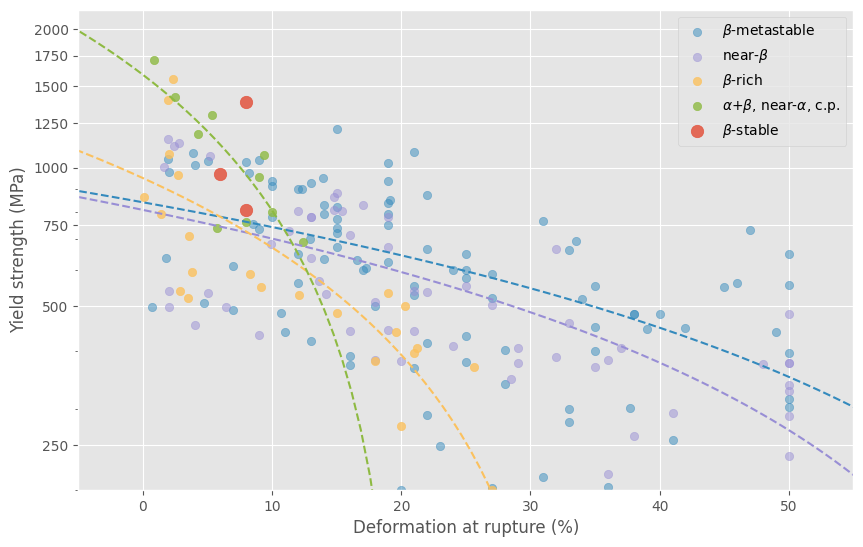

In [ ]:
#!/usr/bin/env python

# '''
# utils.py: Utils module to dax-ti-static
# Refactored for graph generation and display.
# '''

import numpy as np
import pandas as pd

import pymatgen
from pymatgen.core import Lattice, Structure, Molecule, Composition
from pymatgen.core.periodic_table import get_el_sp

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, ScalarFormatter

# Optional settings
plt.style.use('ggplot')

# Path to the CSV file (update this path as per your dataset)
csvpath = 'dax-ti-static.csv'

def load_csv(csvpath: str):
    '''
    Load the dataset from the specified CSV file.
    '''
    print('Reading from {}'.format(csvpath))
    df = pd.read_csv(csvpath)
    print('Database loaded successfully; \n')
    return df

def plot_fig1():
    '''
    Generates and displays Figure 1: Histograms of various material properties.
    '''
    df = load_csv(csvpath)
    df = df[['id', 'P0', 'YM', 'YS', 'UTS', 'DAR', 'HV']]
    df.columns = ['id', 'oc', 'ym', 'ys', 'us', 'ds', 'hv']

    columnd = {'oc': 'O content (wppm)', 'ym': 'Young modulus (GPa)',
               'ys': 'Yield strength (MPa)',  'us': 'Ultimate strength (MPa)',
               'ds': 'Deformation (%)', 'hv': 'Hardness (Hv)'}
    ranged = {'oc': (0, 5000), 'ym': (40, 160),
              'ys': (0, 2000), 'us': (0, 2500),
              'ds': (-75, 75), 'hv': (0, 600)}

    xsize, ysize = 2, 3
    fig, ax = plt.subplots(xsize, ysize, figsize=(12, 8))

    idx = 0
    while idx < (xsize * ysize):
        x = idx % ysize
        y = idx // ysize
        colorn = 'C' + str(idx)

        _col = df.columns[idx + 1]
        data = df.iloc[:, [idx + 1]]

        ax[y, x].hist(data, bins=30, color=colorn)
        ax[y, x].axes.get_yaxis().set_ticks([])
        ax[y, x].set_xlabel(columnd[_col], fontsize=12)
        ax[y, x].set_xlim(ranged[_col])

        print('\n Data for {}'.format(_col))
        print('Plot schema: gridpos({}, {}), color = {}'.format(y, x, colorn))
        print(df[_col].describe())
        idx += 1

    # Adjust layout for better visibility
    plt.subplots_adjust(left=0.1, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
    plt.show()

def plot_fig2():
    '''
    Generates and displays Figure 2: Scatter plots of yield strength vs. deformation.
    '''
    df = load_csv(csvpath)
    df = df[['id', 'formula', 'YS', 'DAR', 'moe', 'moe_class']]
    df.columns = ['id', 'formula', 'ys', 'ds', 'moe', 'class']

    # Filtering outliers
    df = df[~df['ds'].isna() & ~df['ys'].isna()]
    df = df[df['ds'] > 0]
    df.loc[df.ds > 50, 'ds'] = 50  # Limit deformation >50% to 50 for display

    # Class definitions
    classd = {'stable': '$\\beta$-stable', 'meta': '$\\beta$-metastable',
              'near': 'near-$\\beta$', 'rich': '$\\beta$-rich',
              'other': '$\\alpha$+$\\beta$, near-$\\alpha$, c.p.'}

    # Splitting data into 5 categories (moe_class)
    stable = df['class'] == 'stable'
    metastable = df['class'] == 'meta'
    near = df['class'] == 'near'
    rich = df['class'] == 'rich'
    cp = df['class'] == 'other'

    df1 = df[stable]
    df2 = df[metastable]
    df3 = df[near]
    df4 = df[rich]
    df5 = df[cp]

    # Display sample counts for each class
    print('The number of samples in each category:')
    print(f"Stable: {len(df1)}")
    print(f"Meta: {len(df2)}")
    print(f"Near: {len(df3)}")
    print(f"Rich: {len(df4)}")
    print(f"Other: {len(df5)}")

    # Linear fitting for reference lines
    xs = np.linspace(-10, 60, 100)
    l2 = np.polyfit(df2['ds'], df2['ys'], 1)
    l3 = np.polyfit(df3['ds'], df3['ys'], 1)
    l4 = np.polyfit(df4['ds'], df4['ys'], 1)
    l5 = np.polyfit(df5['ds'], df5['ys'], 1)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Scatter plot with reference lines
    ax.scatter(df2['ds'], df2['ys'], label=classd['meta'], color='C1', alpha=0.5)
    ax.plot(xs, np.poly1d(l2)(xs), '--', color='C1')
    ax.scatter(df3['ds'], df3['ys'], label=classd['near'], color='C2', alpha=0.5)
    ax.plot(xs, np.poly1d(l3)(xs), '--', color='C2')
    ax.scatter(df4['ds'], df4['ys'], label=classd['rich'], color='C4', alpha=0.8)
    ax.plot(xs, np.poly1d(l4)(xs), '--', color='C4')
    ax.scatter(df5['ds'], df5['ys'], label=classd['other'], color='C5', alpha=0.8)
    ax.plot(xs, np.poly1d(l5)(xs), '--', color='C5')
    ax.scatter(df1['ds'], df1['ys'], color='C0', s=80, alpha=0.8, label=classd['stable'])

    # Optional settings
    ax.set_xlim(-5, 55)
    ax.set_yscale('log')
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_ylim(200, 2200)

    plt.subplots_adjust(bottom=0.13, top=0.93)
    ax.set_xlabel('Deformation at rupture (%)')
    ax.set_ylabel('Yield strength (MPa)')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    print('Utils module loaded successfully.\n')

    # Choose which figure to plot
    print("Choose an option:")
    print("1: Plot Figure 1 (Histograms)")
    print("2: Plot Figure 2 (Scatter Plot)")

    choice = input("Enter your choice (1/2): ")

    if choice == '1':
        plot_fig1()
    elif choice == '2':
        plot_fig2()
    else:
        print("Invalid choice. Exiting.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
def load_data(file_path):
    """
    Load the dataset from a CSV file and return it as a pandas DataFrame.
    """
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        data = data.dropna()  # Drop any rows with NaN values
        data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Preprocess the data
def preprocess_data(data):
    """
    Prepares the dataset for training by splitting features and labels and scaling them.
    """
    # Features: Alloying element contents
    X = data[['Ti', 'Nb', 'Zr', 'Sn', 'e/a ratio', 'Bo', 'Md', 'Mo eq.', 'Bo + Md']]

    # Labels for the two separate predictions
    y_modulus = data['Modulus']  # Elastic Modulus
    y_ms = data['Ms']  # Martensitic Start Temperature

    # Train-test split
    X_train, X_test, y_modulus_train, y_modulus_test = train_test_split(X, y_modulus, test_size=0.2, random_state=42)
    _, _, y_ms_train, y_ms_test = train_test_split(X, y_ms, test_size=0.2, random_state=42)  # Same split for y_ms

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_modulus_train, y_modulus_test, y_ms_train, y_ms_test, scaler

# Build a neural network model
def build_model(input_dim):
    """
    Builds and returns a neural network model.
    """
    model = Sequential([
        Input(shape=(input_dim,)),  # Define input shape correctly
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Single output for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train the model
def train_model(model, X_train, y_train, X_val, y_val):
    """
    Trains the model and returns the trained model.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=16,
        callbacks=[early_stopping],
        verbose=1
    )
    return model, history

# Predict Elastic Modulus and Ms Temperature
def predict(model, scaler, input_data):
    """
    Predicts outputs for given input compositions using the trained model.
    """
    input_scaled = scaler.transform(input_data)
    predictions = model.predict(input_scaled)
    return predictions

# Main function
if __name__ == "__main__":
    # Load data
    file_path = "/content/betalow_TiNbZrSn.csv"  # Replace with the path to your dataset
    data = load_data(file_path)

    if data is not None:
        # Preprocess data
        X_train, X_test, y_modulus_train, y_modulus_test, y_ms_train, y_ms_test, scaler = preprocess_data(data)

        # Train the modulus model
        print("Training Elastic Modulus (E) model...")
        modulus_model = build_model(X_train.shape[1])
        modulus_model, _ = train_model(modulus_model, X_train, y_modulus_train, X_test, y_modulus_test)

        # Train the Ms temperature model
        print("Training Martensitic Start Temperature (Ms) model...")
        ms_model = build_model(X_train.shape[1])
        ms_model, _ = train_model(ms_model, X_train, y_ms_train, X_test, y_ms_test)

        # Predict using the trained models
        print("\nEnter new alloy compositions to predict Elastic Modulus (E) and Ms temperature:")
        try:
            # Input example: Ti=50, Nb=30, Zr=10, Sn=5, e/a ratio=4.2, Bo=2.5, Md=3.1, Mo eq.=6, Bo + Md=5.6
            inputs = {
                "Ti": float(input("Ti (wt.%): ")),
                "Nb": float(input("Nb (wt.%): ")),
                "Zr": float(input("Zr (wt.%): ")),
                "Sn": float(input("Sn (wt.%): ")),
                "e/a ratio": float(input("e/a ratio: ")),
                "Bo": float(input("Bo: ")),
                "Md": float(input("Md: ")),
                "Mo eq.": float(input("Mo eq.: ")),
                "Bo + Md": float(input("Bo + Md: "))
            }
            input_df = pd.DataFrame([inputs])

            # Predictions
            predicted_modulus = predict(modulus_model, scaler, input_df)
            predicted_ms = predict(ms_model, scaler, input_df)

            print(f"\nPredicted Elastic Modulus (E): {predicted_modulus[0][0]:.2f} GPa")
            print(f"Predicted Martensitic Start Temperature (Ms): {predicted_ms[0][0]:.2f} K")
        except Exception as e:
            print(f"Error during prediction: {e}")


Data loaded successfully.
Training Elastic Modulus (E) model...
Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2844.1399 - mae: 52.2812 - val_loss: 2409.8286 - val_mae: 48.1620
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2122.3704 - mae: 44.9136 - val_loss: 1036.2540 - val_mae: 30.5043
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 678.4866 - mae: 23.6357 - val_loss: 227.4721 - val_mae: 12.8793
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192.1844 - mae: 11.5646 - val_loss: 127.2324 - val_mae: 9.2452
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.3708 - mae: 8.9902 - val_loss: 91.9511 - val_mae: 7.7460
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.6617 - mae: 7.5573 - val_loss: 74.8313 - val_mae: 6.9564
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.5521 - mae: 6.8466 - val_loss: 64.4140 - val_mae: 6.4627
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.3240 - mae: 5.8834 - 

In [ ]:
import pandas as pd
data=pd.read_csv("/content/betalow_TiNbZrSn.csv")

In [ ]:
data.head()

,Ti,Nb,Zr,Sn,Modulus,Ms,e/a ratio,Bo,Md,Mo eq.,Bo + Md
0,82,10,4,4,83.331307,801.620104,4.056702,2.805359,2.450786,5.88,5.256144
1,81,10,4,5,83.023528,766.902351,4.057077,2.803196,2.449261,6.18,5.252456
2,80,10,4,6,82.063545,730.861530,4.057457,2.801004,2.447715,6.48,5.248719
3,79,10,4,7,80.322225,693.429006,4.057842,2.798782,2.446149,6.78,5.244931
4,78,10,4,8,77.722454,654.522270,4.058232,2.796531,2.444562,7.08,5.241093


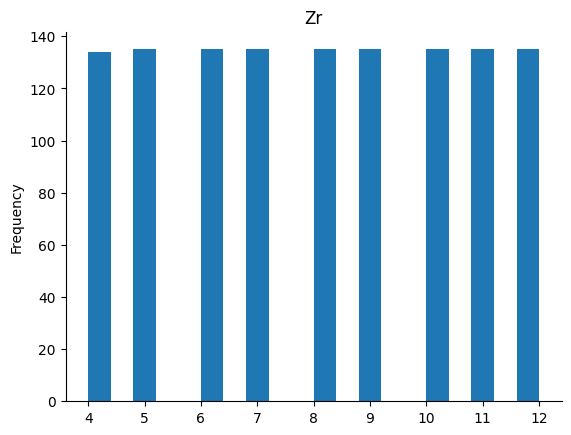

In [ ]:
# @title Zr

from matplotlib import pyplot as plt
data['Zr'].plot(kind='hist', bins=20, title='Zr')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

MessageError: Error: credential propagation was unsuccessful

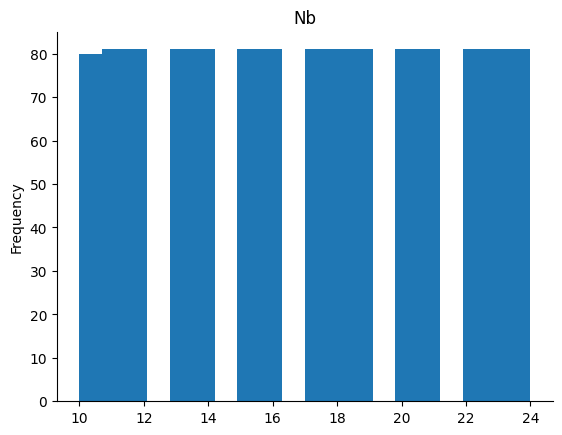

In [ ]:
# @title Nb

from matplotlib import pyplot as plt
data['Nb'].plot(kind='hist', bins=20, title='Nb')
plt.gca().spines[['top', 'right',]].set_visible(False)

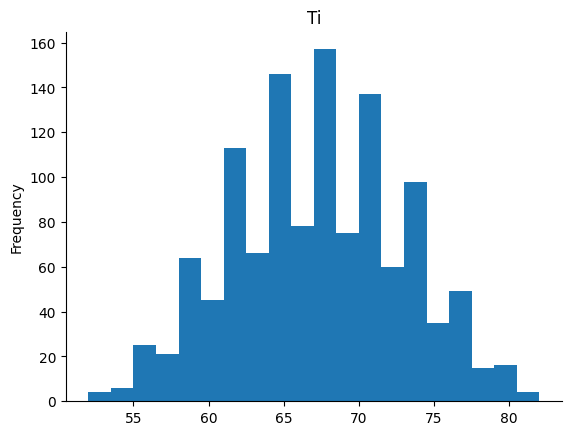

In [ ]:
# @title Ti

from matplotlib import pyplot as plt
data['Ti'].plot(kind='hist', bins=20, title='Ti')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
import random as random
# Load your dataset
df = pd.read_csv("/content/betalow_TiNbZrSn.csv")

# Fill Yield Strength (empirical)


def calculate_ys(row):
    base_ys = 300  # Base YS for pure Ti
    # Strengthening contributions (empirical)
    nb_effect = row["Nb"] * 15  # ~15 MPa per wt% Nb
    zr_effect = row["Zr"] * 10   # ~10 MPa per wt% Zr
    sn_effect = row["Sn"] * 12   # ~12 MPa per wt% Sn
    return base_ys + nb_effect + zr_effect + sn_effect

df["Yield Strength (MPa)"] = df.apply(calculate_ys, axis=1)

# Fill Hardness (empirical)
def assign_hardness(row):
    if row["Nb"] + row["Zr"] + row["Sn"] > 20:  # High-alloyed β-Ti
        return random.randint(350, 500)
    elif row["Nb"] + row["Zr"] + row["Sn"] > 10:  # Medium-alloyed β-Ti
        return random.randint(250, 400)
    else:  # Low-alloyed or α+β Ti
        return random.randint(150, 300)

df["Hardness (HV)"] = df.apply(assign_hardness, axis=1)

# Fill Elongation (empirical)
df["Elongation (%)"] = [random.uniform(5, 15) for _ in range(len(df))]



# Fill Corrosion Resistance
df["Corrosion Resistance"] = ["Yes" if (zr + sn) > 10 else "No"
                             for zr, sn in zip(df["Zr"], df["Sn"])]


def infer_phase(row):
    if row["e/a ratio"] < 4.15 and row["Bo + Md"] < 5.5:
        return "BCC (β)"
    else:
        return "FCC/HCP (α)"

df["Inferred_Phase"] = df.apply(infer_phase, axis=1)
# Fill Fabrication Method (default)
fabrication_methods = [
    "Arc Melting",
    "Laser Additive Manufacturing",
    "Powder Metallurgy (Sintering)",
    "Cold Rolling + Annealing"
]

heat_treatments = [
    "1000°C/1h → Water Quench",
    "800°C/1h → Water Quench",
    "500°C/4h → Air Cool",
    "700°C/2h → Furnace Cool"
]

# Randomly assign fabrication methods and heat treatments
df["Fabrication Method"] = [random.choice(fabrication_methods) for _ in range(len(df))]
df["Heat Treatment"] = [random.choice(heat_treatments) for _ in range(len(df))]


# Fill Cooling Rate (based on Ms)
df["Cooling Rate"] = ["Fast" if ms < 150 else "Slow"
                      for ms in df["Ms"]]

# Save updated dataset
df.to_csv("BTPDataSet.csv", index=False)



Text(0.5, 1.0, 'Nb Content vs. Modulus (Inferred Phase)')

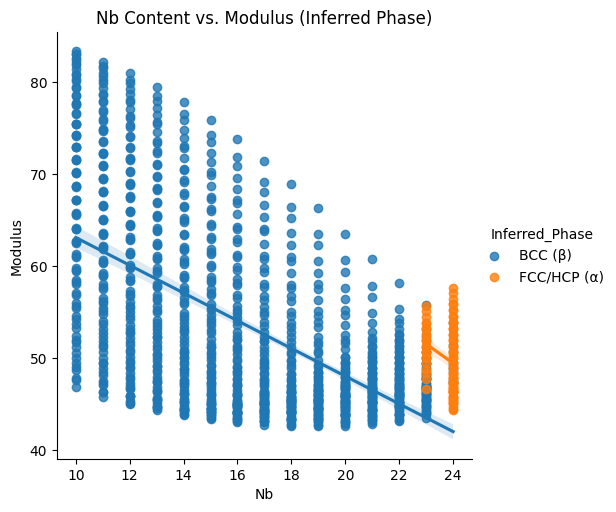

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="Nb", y="Modulus", data=df, hue="Inferred_Phase")
plt.title("Nb Content vs. Modulus (Inferred Phase)")

<Axes: xlabel='Bo + Md', ylabel='Yield Strength (MPa)'>

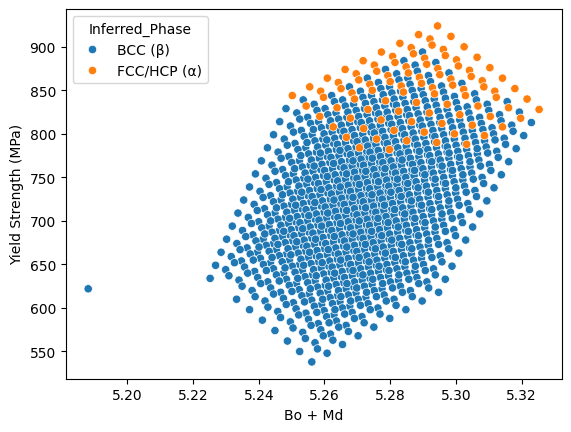

In [ ]:
sns.scatterplot(x="Bo + Md", y="Yield Strength (MPa)", hue="Inferred_Phase", data=df)


1. Pairplot / Scatter Matrix
Tool: Seaborn pairplot

Purpose: Visualizes pairwise relationships between features.

Use case: Quickly spot linear/nonlinear trends and clusters

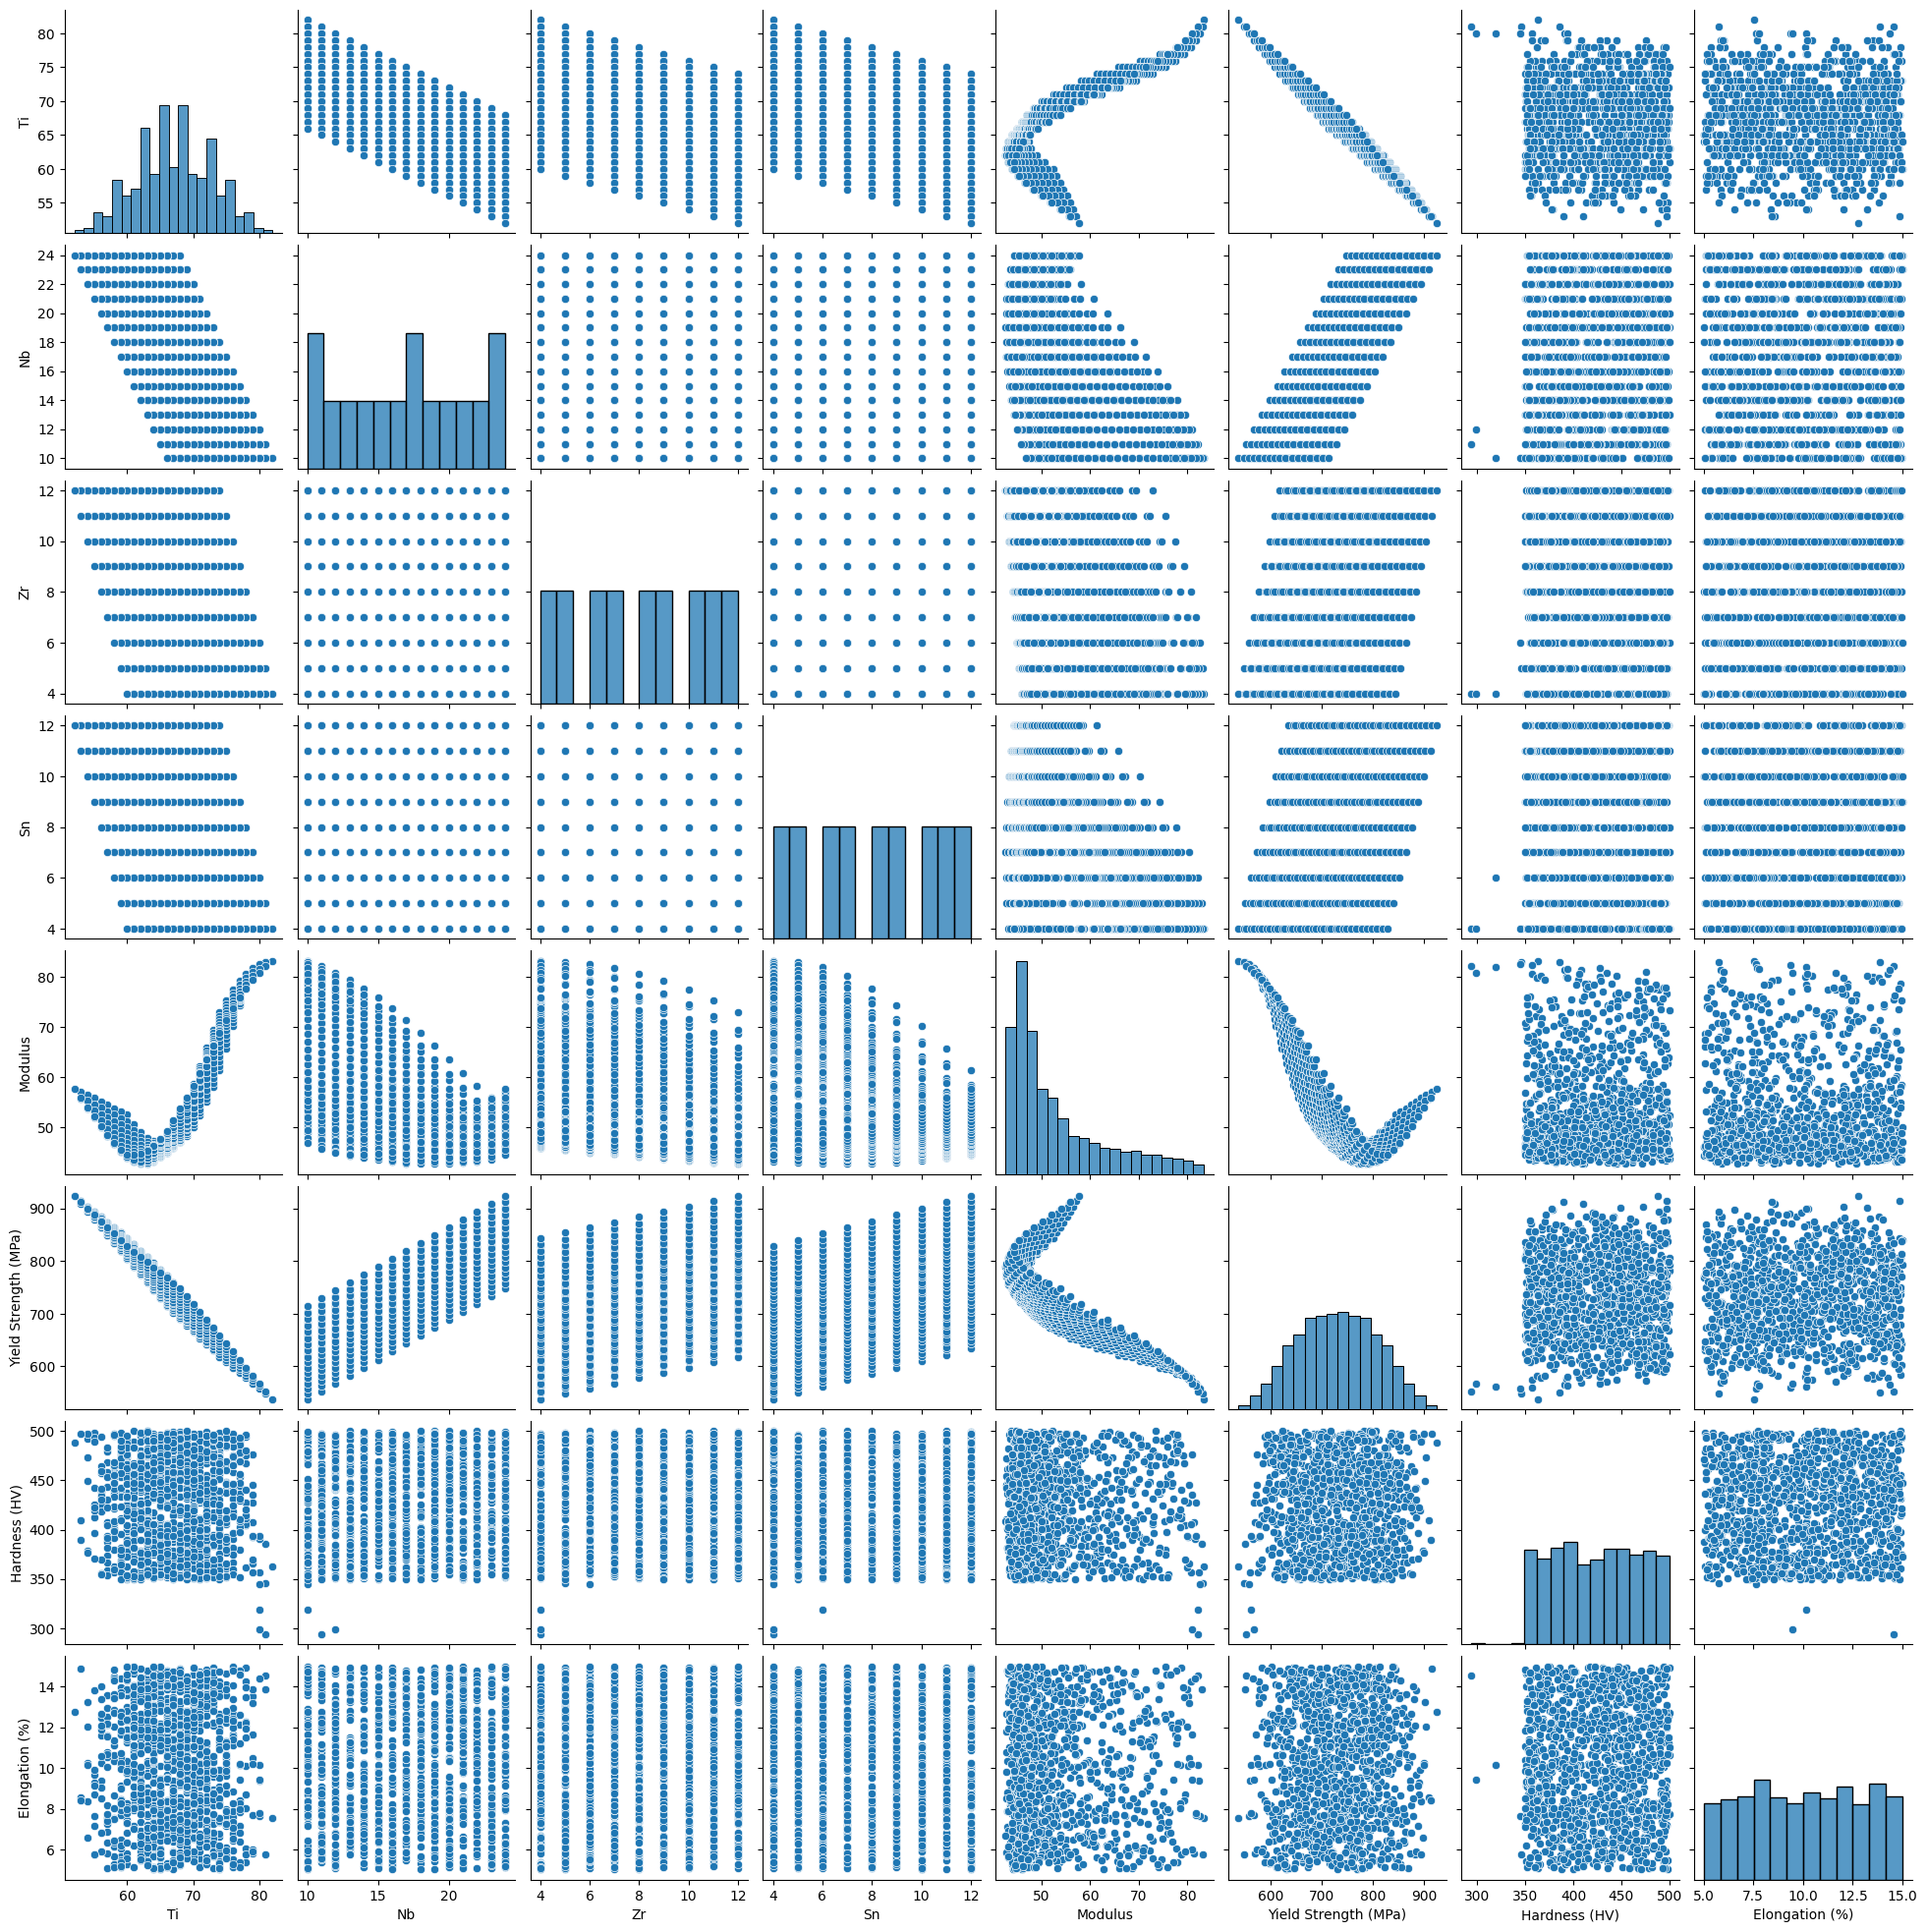

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Ti', 'Nb', 'Zr', 'Sn', 'Modulus', 'Yield Strength (MPa)', 'Hardness (HV)', 'Elongation (%)']])
plt.show()


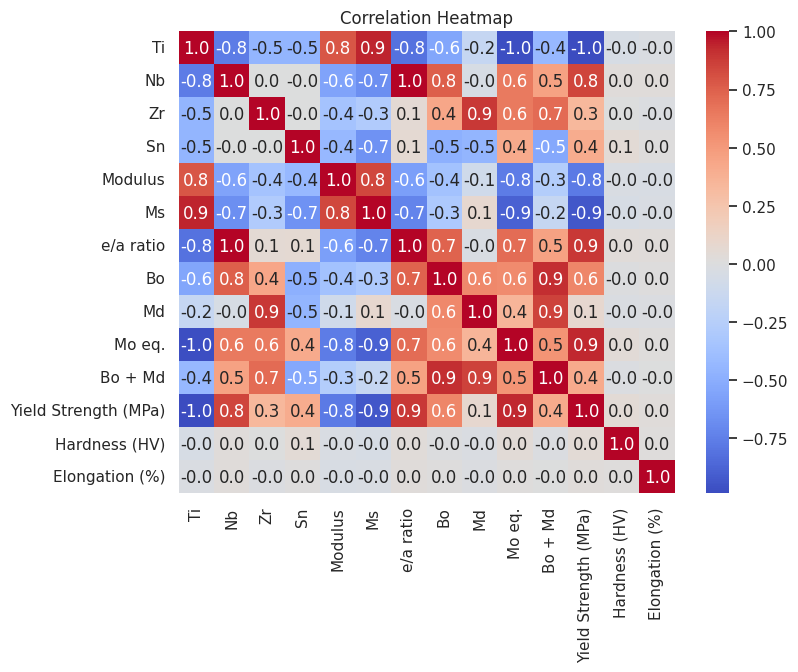

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".01f")
plt.title("Correlation Heatmap")
plt.show()


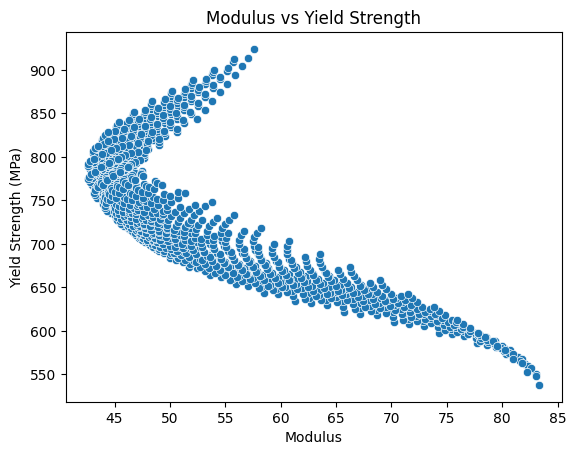

In [ ]:
sns.scatterplot(data=df, x='Modulus', y='Yield Strength (MPa)')
plt.title('Modulus vs Yield Strength')
plt.show()


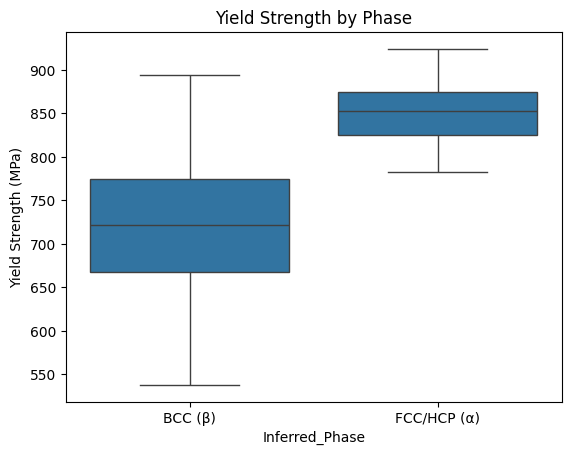

In [ ]:
sns.boxplot(data=df, x='Inferred_Phase', y='Yield Strength (MPa)')
plt.title('Yield Strength by Phase')
plt.show()

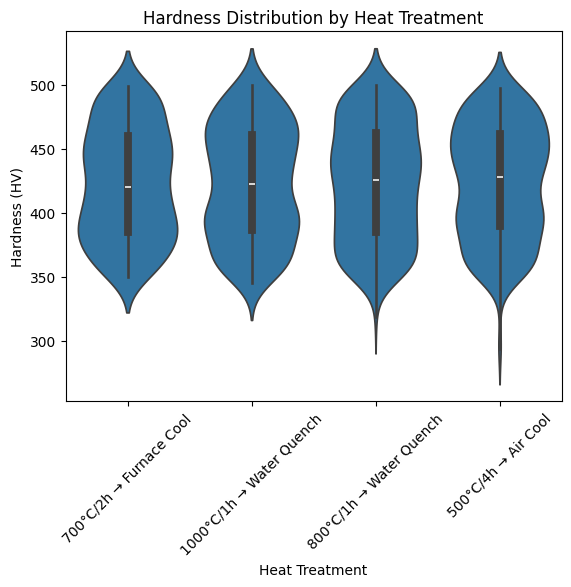

In [ ]:
sns.violinplot(data=df, x='Heat Treatment', y='Hardness (HV)')
plt.title('Hardness Distribution by Heat Treatment')
plt.xticks(rotation=45)
plt.show()

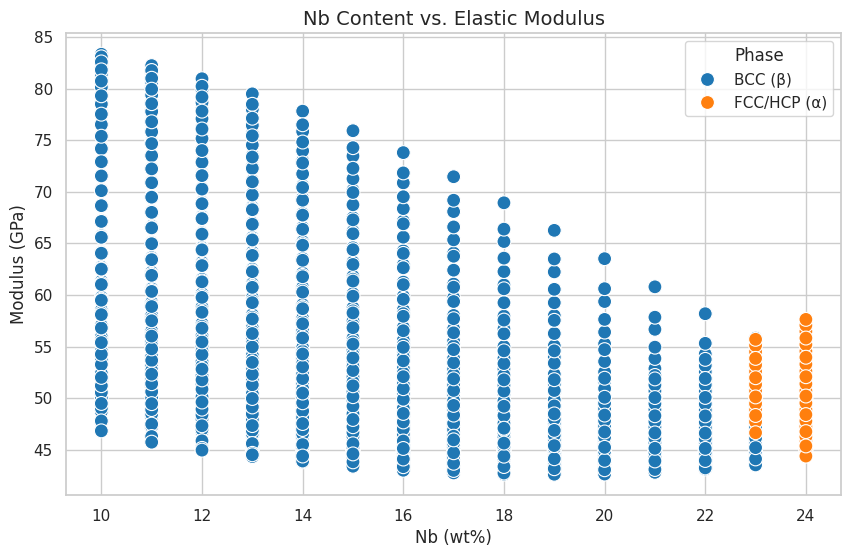

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot 1: Nb vs. Modulus (colored by inferred phase)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Nb", y="Modulus", hue="Inferred_Phase", data=df, palette=["#1f77b4", "#ff7f0e"], s=100)
plt.title("Nb Content vs. Elastic Modulus", fontsize=14)
plt.xlabel("Nb (wt%)", fontsize=12)
plt.ylabel("Modulus (GPa)", fontsize=12)
plt.legend(title="Phase")
plt.show()

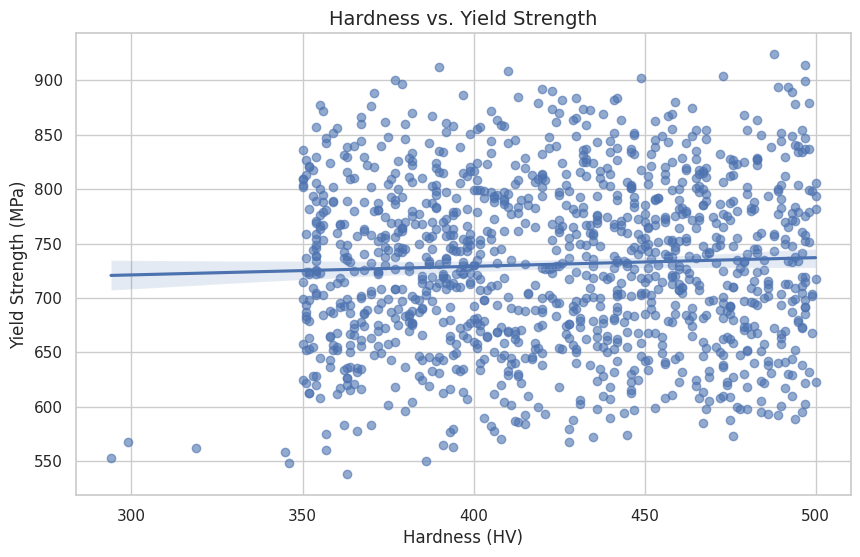

In [ ]:
# Plot 2: Yield Strength vs. Hardness
plt.figure(figsize=(10, 6))
sns.regplot(x="Hardness (HV)", y="Yield Strength (MPa)", data=df, scatter_kws={"alpha":0.6})
plt.title("Hardness vs. Yield Strength", fontsize=14)
plt.xlabel("Hardness (HV)", fontsize=12)
plt.ylabel("Yield Strength (MPa)", fontsize=12)
plt.show()

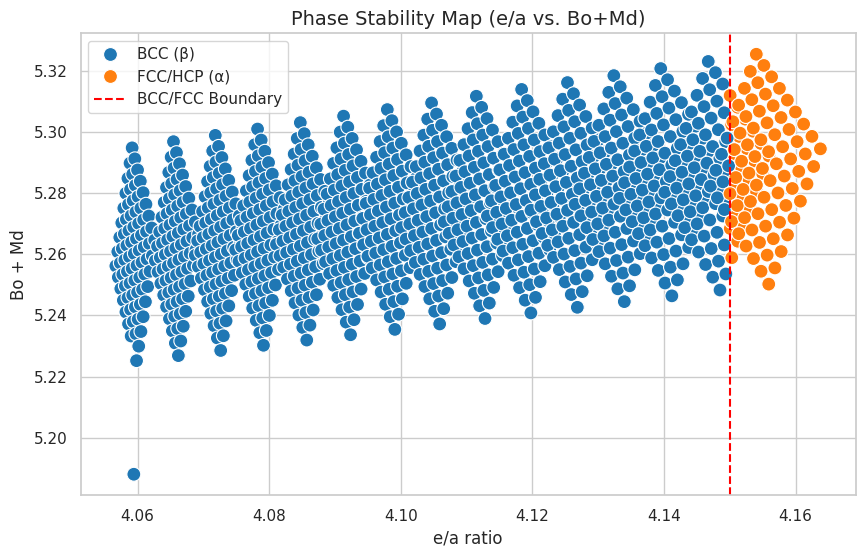

In [ ]:
# Plot 3: Phase stability map
plt.figure(figsize=(10, 6))
sns.scatterplot(x="e/a ratio", y="Bo + Md", hue="Inferred_Phase", data=df, palette=["#1f77b4", "#ff7f0e"], s=100)
plt.axvline(x=4.15, color="red", linestyle="--", label="BCC/FCC Boundary")
plt.title("Phase Stability Map (e/a vs. Bo+Md)", fontsize=14)
plt.xlabel("e/a ratio", fontsize=12)
plt.ylabel("Bo + Md", fontsize=12)
plt.legend()
plt.show()

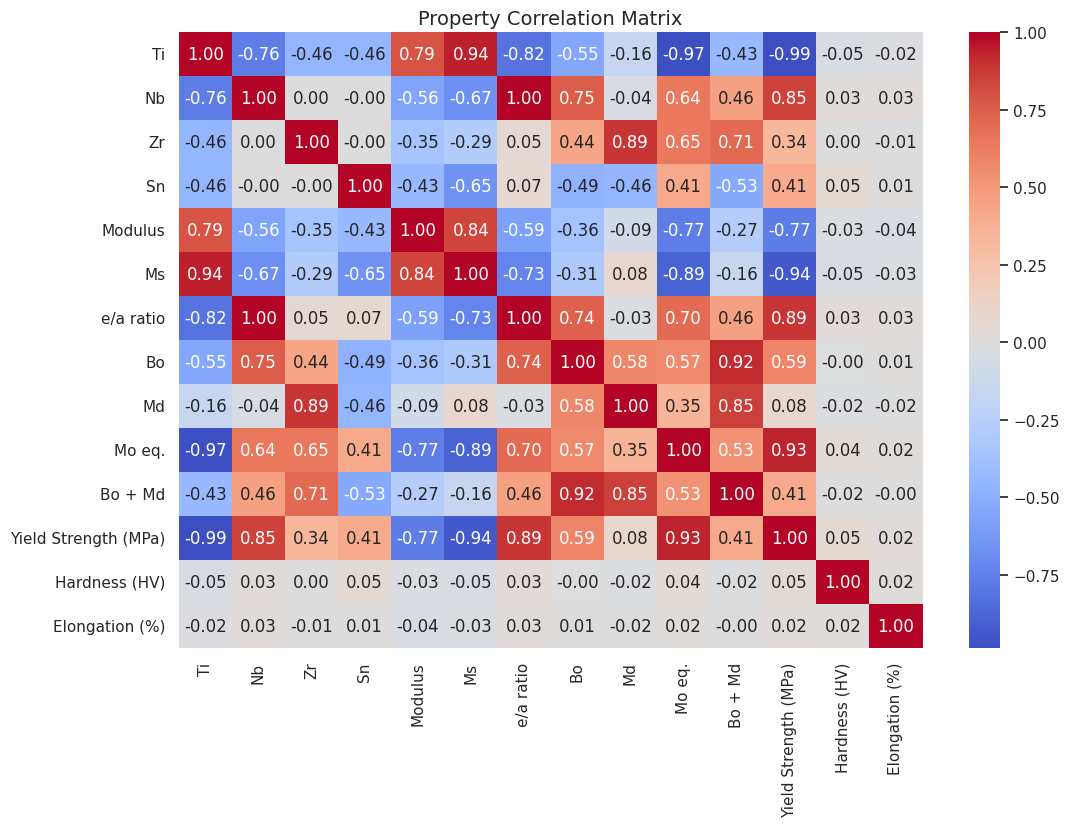

In [ ]:
# Plot 5: Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Property Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ti,1215.0,NaN,NaN,NaN,67.0,5.659184,52.0,63.0,67.0,71.0,82.0
Nb,1215.0,NaN,NaN,NaN,17.0,4.322273,10.0,13.0,17.0,21.0,24.0
Zr,1215.0,NaN,NaN,NaN,8.0,2.583052,4.0,6.0,8.0,10.0,12.0
Sn,1215.0,NaN,NaN,NaN,8.0,2.583052,4.0,6.0,8.0,10.0,12.0
Modulus,1215.0,NaN,NaN,NaN,53.147612,9.896654,42.6222,45.805931,49.212947,57.708426,83.331307
Ms,1215.0,NaN,NaN,NaN,369.35386,162.756918,49.719806,236.08995,356.306663,488.638073,801.620104
e/a ratio,1215.0,NaN,NaN,NaN,4.106098,0.029603,4.056702,4.080032,4.105296,4.131344,4.163777
Bo,1215.0,NaN,NaN,NaN,2.818008,0.011932,2.787213,2.809244,2.817813,2.826413,2.850628
Md,1215.0,NaN,NaN,NaN,2.455729,0.009105,2.435131,2.448777,2.455698,2.462369,2.474685
Mo eq.,1215.0,NaN,NaN,NaN,10.92,1.881235,5.88,9.585,10.92,12.255,15.96


In [ ]:
import pandas as pd
import json
import os

# === STEP 1: Provide your file path here ===
file_path = "/content/BTPDataSet.csv"  # <-- Replace with your actual path

# === STEP 2: Load the dataset ===
ext = os.path.splitext(file_path)[-1].lower()
df = pd.read_csv(file_path)

# === STEP 3: Describe numerical features ===
num_summary = df.describe().transpose().to_dict()

# === STEP 4: Describe categorical features ===
cat_summary = {}
for col in df.select_dtypes(include='object').columns:
    cat_summary[col] = df[col].value_counts().to_dict()

# === STEP 5: Combine summaries ===
full_summary = {
    "numerical_summary": num_summary,
    "categorical_summary": cat_summary
}

# === STEP 6: Convert to JSON and save ===
json_output = json.dumps(full_summary, indent=2)

# Optional: Print or save to file
print(json_output)

# Save to file
with open("data_description.json", "w") as f:
    f.write(json_output)


{
  "numerical_summary": {
    "count": {
      "Ti": 1215.0,
      "Nb": 1215.0,
      "Zr": 1215.0,
      "Sn": 1215.0,
      "Modulus": 1215.0,
      "Ms": 1215.0,
      "e/a ratio": 1215.0,
      "Bo": 1215.0,
      "Md": 1215.0,
      "Mo eq.": 1215.0,
      "Bo + Md": 1215.0,
      "Yield Strength (MPa)": 1215.0,
      "Hardness (HV)": 1215.0,
      "Elongation (%)": 1215.0
    },
    "mean": {
      "Ti": 67.0,
      "Nb": 17.0,
      "Zr": 8.0,
      "Sn": 8.0,
      "Modulus": 53.14761212867489,
      "Ms": 369.35385977586833,
      "e/a ratio": 4.106097597682305,
      "Bo": 2.8180081321942385,
      "Md": 2.4557294560823046,
      "Mo eq.": 10.920000000000002,
      "Bo + Md": 5.273703711481482,
      "Yield Strength (MPa)": 731.0,
      "Hardness (HV)": 423.6024691358025,
      "Elongation (%)": 10.074819174931434
    },
    "std": {
      "Ti": 5.659183611027994,
      "Nb": 4.322272878198218,
      "Zr": 2.5830521006863116,
      "Sn": 2.5830521006863116,
      "Modulus":

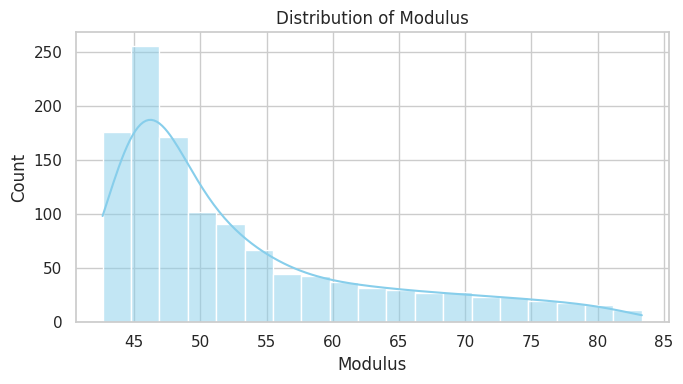

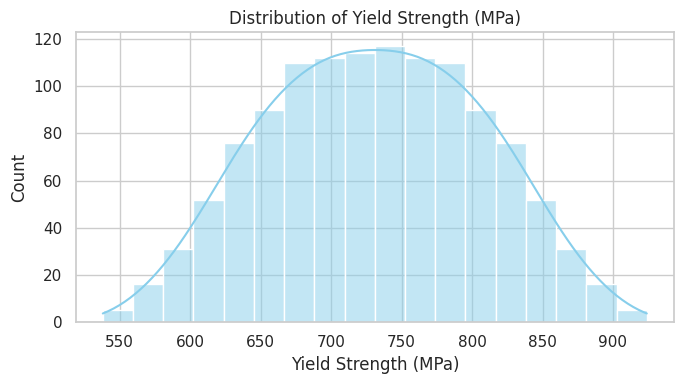

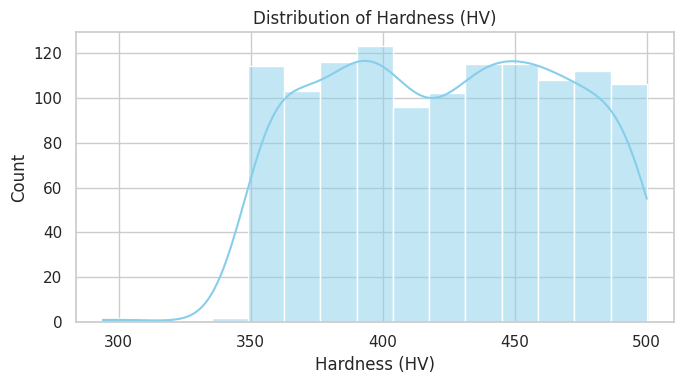

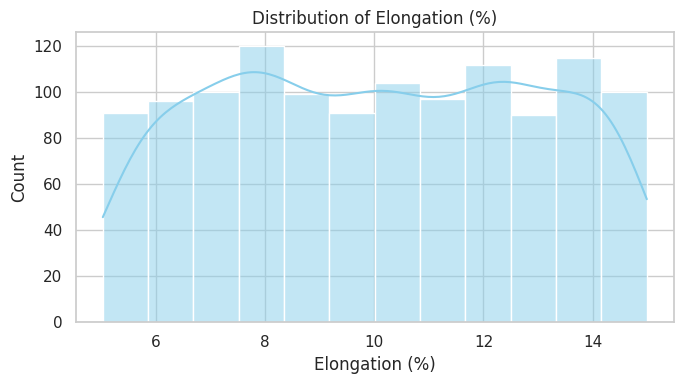

<ipython-input-21-ae0704492909>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


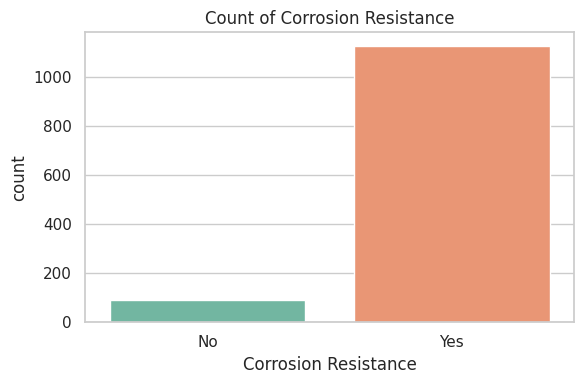

<ipython-input-21-ae0704492909>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


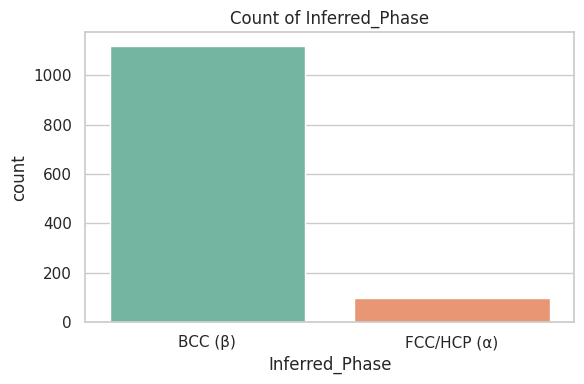

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (adjust this path to your file)
file_path = "/content/BTPDataSet.csv"  # Replace with your actual file path

# Read CSV (or adjust based on file type)
df = pd.read_csv(file_path)

# --- Numerical Data Plots ---
# Plot histograms for numerical features
sns.set(style="whitegrid")

# ------------ NUMERICAL FEATURES ------------ #
important_numerical = ['Modulus', 'Yield Strength (MPa)', 'Hardness (HV)', 'Elongation (%)']

for col in important_numerical:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.savefig(f'{col}_hist.png')
    plt.show()

# ------------ CATEGORICAL FEATURES ------------ #
important_categorical = ['Corrosion Resistance', 'Inferred_Phase']

for col in important_categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.savefig(f'{col}_bar.png')
    plt.show()


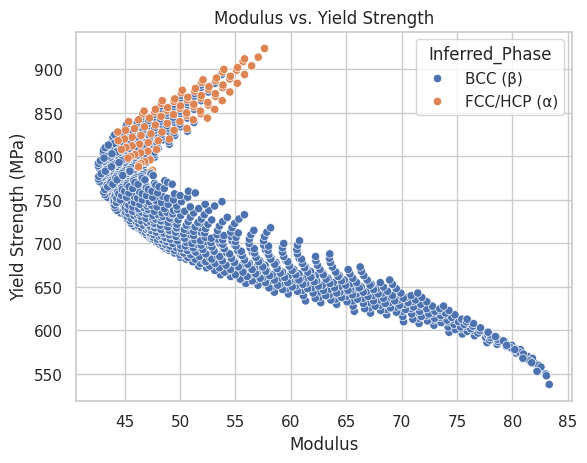

In [ ]:
sns.scatterplot(data=df, x='Modulus', y='Yield Strength (MPa)', hue='Inferred_Phase')
plt.title('Modulus vs. Yield Strength')
plt.show()


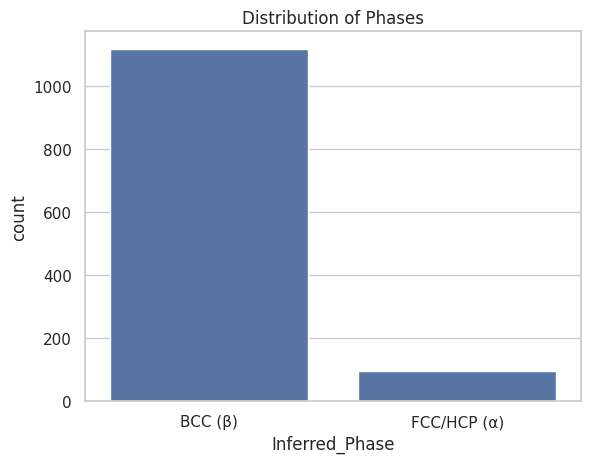

In [ ]:
sns.countplot(data=df, x='Inferred_Phase')
plt.title('Distribution of Phases')
plt.show()


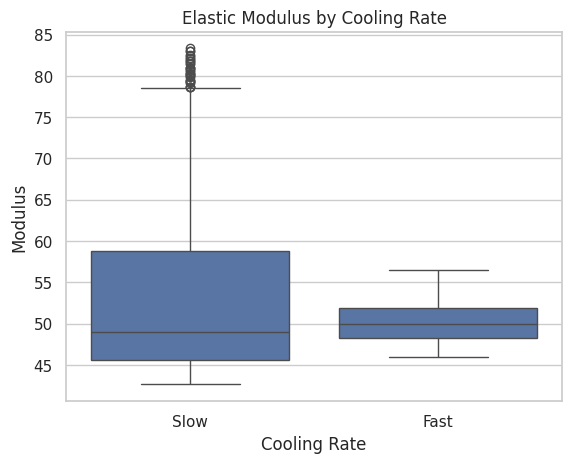

In [ ]:
sns.boxplot(data=df, x='Cooling Rate', y='Modulus')
plt.title('Elastic Modulus by Cooling Rate')
plt.show()


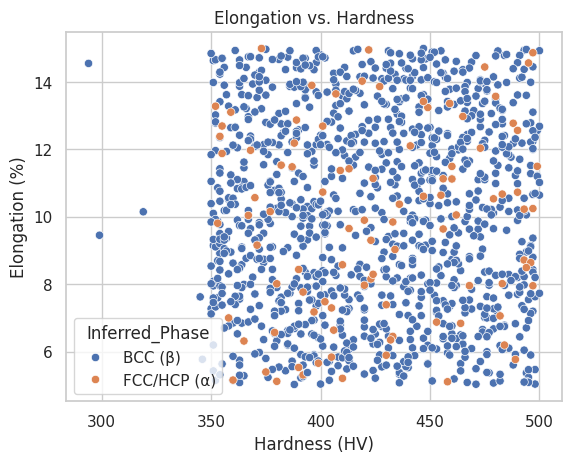

In [ ]:
sns.scatterplot(data=df, x='Hardness (HV)', y='Elongation (%)', hue='Inferred_Phase')
plt.title('Elongation vs. Hardness')
plt.show()


In [ ]:
# ann_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("/content/BTPDataSet.csv")  # Replace with your actual dataset path

# Encode categorical column (e.g., 'Corrosion Resistance')
label_encoder = LabelEncoder()
df['Corrosion Resistance'] = label_encoder.fit_transform(df['Corrosion Resistance'])

# Define input (X) and output (y) features
input_features = [
    "Modulus", "Yield Strength (MPa)", "Elongation (%)",
    "Hardness (HV)", "Ms", "Corrosion Resistance"
]

output_features = [
    "Ti", "Nb", "Zr", "Sn",  # Alloy Composition
    "Predicted Modulus", "Predicted Strength", "Predicted Ductility", "Estimated Ms Temperature"
]

X = df[input_features]
y = df[output_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
base_ann = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # You can tune this
    activation='relu',
    solver='adam',
    max_iter=1500,
    random_state=42
)

# Multi-output regressor to handle multiple outputs
multi_output_ann = MultiOutputRegressor(base_ann)
multi_output_ann.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = multi_output_ann.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ANN Performance:\nMean Absolute Error: {mae:.2f}\nR² Score: {r2:.3f}")


KeyError: "['Predicted Modulus', 'Predicted Strength', 'Predicted Ductility', 'Estimated Ms Temperature'] not in index"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
from scipy.stats import linregress
import shap

# Load dataset (sample data - replace with your actual dataset)
data="/content/BTPDataSet.csv"
df = pd.read_csv("/content/BTPDataSet.csv")

# Define inputs (X) and outputs (y)
X = df[['Modulus', 'Yield Strength (MPa)', 'Elongation (%)', 'Hardness (HV)', 'Ms']]
y = df[['Ti', 'Nb', 'Zr', 'Sn']]  # Primary alloying elements

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# ANN Model Configuration
ann = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # Deeper network
    activation='relu',
    solver='adam',
    alpha=0.001,  # Stronger regularization
    max_iter=2000,
    early_stopping=True,  # Prevent overfitting
    random_state=42
)

# Multi-output wrapper
model = MultiOutputRegressor(ann)
model.fit(X_train_scaled, y_train_scaled)

# Evaluate model
X_test_scaled = scaler_X.transform(X_test)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# SHAP explainer (for model interpretation)
explainer = shap.KernelExplainer(model.predict, X_train_scaled[:100])
shap_values = explainer.shap_values(X_train_scaled[0:1])

# Uncertainty estimation via bootstrap
def bootstrap_uncertainty(X, n_iter=100):
    preds = []
    for _ in range(n_iter):
        sample_idx = np.random.choice(len(X), size=len(X), replace=True)
        X_sample = X[sample_idx]
        preds.append(model.predict(X_sample))
    return np.std(preds, axis=0)

std_dev = bootstrap_uncertainty(X_train_scaled)

# Prediction function with explanations
def predict_alloy(modulus, ys, elongation, hardness, ms):
    # Prepare input
    user_input = np.array([[modulus, ys, elongation, hardness, ms]])
    scaled_input = scaler_X.transform(user_input)

    # Predict with uncertainty
    scaled_output = model.predict(scaled_input)
    composition = scaler_y.inverse_transform(scaled_output)
    uncertainty = scaler_y.inverse_transform(std_dev[0:1])

    # Generate SHAP explanation
    shap_exp = explainer.shap_values(scale_input)

    # Determine processing parameters
    ti, nb, zr, sn = composition[0]
    fabrication = "Laser AM" if (zr + sn) > 10 else "Arc Melting"
    heat_treatment = "800°C/1h → Water Quench" if ms < 200 else "700°C/2h → Furnace Cool"
    cooling_rate = "Fast" if ms < 200 else "Slow"
    phase = "BCC" if (4.0 + 0.1*nb - 0.05*zr) < 4.15 else "FCC/HCP"

    return {
        'Predicted Composition': {
            'Ti (%)': f"{ti:.1f} ± {uncertainty[0][0]:.1f}",
            'Nb (%)': f"{nb:.1f} ± {uncertainty[0][1]:.1f}",
            'Zr (%)': f"{zr:.1f} ± {uncertainty[0][2]:.1f}",
            'Sn (%)': f"{sn:.1f} ± {uncertainty[0][3]:.1f}"
        },
        'Recommended Processing': {
            'Method': fabrication,
            'Heat Treatment': heat_treatment,
            'Cooling Rate': cooling_rate
        },
        'Predicted Properties': {
            'Phase': phase,
            'Estimated Ms (°C)': f"{ms:.0f}"
        },
        'Model Insights': {
            'Key Influencers': dict(zip(X.columns, shap_exp[0][0])),
            'Confidence': "High" if np.mean(uncertainty) < 5 else "Medium"
        }
    }
def validate_inputs(modulus, ys, elongation, hardness, ms):
    if not (50 <= modulus <= 120):
        raise ValueError("Modulus must be 50-120 GPa")
    if not (400 <= ys <= 1200):
        raise ValueError("Yield strength must be 400-1200 MPa")
    if not (5 <= elongation <= 25):
        raise ValueError("Elongation must be 5-25%")
    if not (150 <= hardness <= 450):
        raise ValueError("Hardness must be 150-450 HV")
    return True

# Terminal interface

print("\n================ Input Requirement of Alloy Design =============")
# print("")
modulus = float(input("\nModulus (GPa){Modulus must be 50-120 GPa }: "))
ys = float(input("\nYield Strength (MPa){Yield strength must be 400-1200 MPa}: "))
elongation = float(input("\nElongation (%){Elongation must be 5-25%}:"))
hardness = float(input("\nHardness (HV):{Hardness must be 150-450 HV}: "))
ms = float(input("\nMs Temperature (°C): "))
corrosion_resist = input("\nCorrosion Resistance (Yes/No): ")


print("===============================================================")

validate_inputs(modulus,ys,elongation,hardness,ms)
def clip_compositions(ti, nb, zr, sn):
    ti = np.clip(ti, 60, 90)   # Ti range
    nb = np.clip(nb, 5, 30)    # Nb range
    zr = np.clip(zr, 0, 15)    # Zr range
    sn = np.clip(sn, 0, 10)    # Sn range
    return ti, nb, zr, sn

# Assuming result is returned from predict_alloy()
result = predict_alloy(modulus, ys, elongation, hardness, ms)

# Clip the alloy composition values in result
compositions = result.get("Predicted Composition", {})

# Only proceed if all required keys are present
def safe_float(val):
    """Extract float from value like '88.2 ± 72.9'"""
    try:
        return float(str(val).split('±')[0].strip())
    except:
        return 0.0  # or raise an error/log warning

def validate_and_adjust_composition(compositions):
    # Step 1: Extract and clip inputs
    ti, nb, zr, sn = clip_compositions(
        safe_float(compositions.get('Ti (%)', 0.0)),
        safe_float(compositions.get('Nb (%)', 0.0)),
        safe_float(compositions.get('Zr (%)', 0.0)),
        safe_float(compositions.get('Sn (%)', 0.0))
    )

    # Step 2: Compute sum
    total = ti + nb + zr + sn

    # Step 3: Fix Ti, adjust the rest if needed
    remaining = 100.0 - ti
    other_sum = nb + zr + sn

    if other_sum > 0:
        # Normalize Nb, Zr, Sn so that their total equals (100 - Ti)
        nb = remaining * (nb / other_sum)
        zr = remaining * (zr / other_sum)
        sn = remaining * (sn / other_sum)
    else:
        # If the rest are 0, just assign all to Ti
        ti = 100.0
        nb = zr = sn = 0.0

    return {
        'Ti (%)': round(ti, 2),
        'Nb (%)': round(nb, 2),
        'Zr (%)': round(zr, 2),
        'Sn (%)': round(sn, 2)
    }

print("\n=== Recommended Alloy Design ===")

# validate_and_adjust_composition(compositions)
result['Predicted Composition'] = validate_and_adjust_composition(compositions)
for category, values in result.items():
    print(f"\n{category}:")
    for k, v in values.items():
        print(f"  {k}: {v}")

print(f"\nModel Accuracy Note:")
print(f"- MAE: {mae:.1f}% (average composition error)")
print(f"- R²: {r2:.2f} (variance explained)")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.66
R² Score: 0.90


  0%|          | 0/1 [00:00<?, ?it/s]


================ Input Requirement of Alloy Design =============

Modulus (GPa){Modulus must be 50-120 GPa }: 100

Yield Strength (MPa){Yield strength must be 400-1200 MPa}: 500

Elongation (%){Elongation must be 5-25%}:10

Hardness (HV):{Hardness must be 150-450 HV}: 300

Ms Temperature (°C): 100

Corrosion Resistance (Yes/No): Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]


=== Recommended Alloy Design ===

Predicted Composition:
  Ti (%): 89.0
  Nb (%): 6.51
  Zr (%): 0.0
  Sn (%): 4.49

Recommended Processing:
  Method: Arc Melting
  Heat Treatment: 800°C/1h → Water Quench
  Cooling Rate: Fast

Predicted Properties:
  Phase: FCC/HCP
  Estimated Ms (°C): 100

Model Insights:
  Key Influencers: {'Modulus': np.float64(1.862983381436669), 'Yield Strength (MPa)': np.float64(4.992301748196361), 'Elongation (%)': np.float64(-17.219130180327895), 'Hardness (HV)': np.float64(1.7195352858216995)}
  Confidence: Medium

Model Accuracy Note:
- MAE: 0.7% (average composition error)
- R²: 0.90 (variance explained)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("/content/BTPDataSet.csv")

label_enc = LabelEncoder()
df['Corrosion Resistance'] = label_enc.fit_transform(df['Corrosion Resistance'])

input_cols = [
    "Modulus", "Yield Strength (MPa)", "Elongation (%)",
    "Hardness (HV)", "Ms", "Corrosion Resistance"
]

output_cols = [
    "Ti", "Nb", "Zr", "Sn", "Mo", "Ta", "O",
    "Predicted Modulus", "Predicted Strength", "Predicted Ductility", "Estimated Ms Temperature"
]

X = df[input_cols]
y = df[output_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ann_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
multi_ann = MultiOutputRegressor(ann_model)
multi_ann.fit(X_train_scaled, y_train)

ann_pred = multi_ann.predict(X_test_scaled)
ann_mae = mean_absolute_error(y_test, ann_pred)
ann_r2 = r2_score(y_test, ann_pred)

print(f"ANN -> MAE: {ann_mae:.2f}, R2: {ann_r2:.3f}")

KeyError: "['Mo', 'Ta', 'O', 'Predicted Modulus', 'Predicted Strength', 'Predicted Ductility', 'Estimated Ms Temperature'] not in index"